# titanic

In [2]:
# import libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
tc = pd.read_csv('titanic.csv')

In [4]:
# first 5 rowa and cloumns
tc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# checking columns
tc.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# information about the data
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#checking null values
tc.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# rows and columns
tc.shape

(891, 12)

In [9]:
#drop the Cabin coulmn
tc  = tc.drop('Cabin',axis=1)

In [10]:
#filling the null values
from sklearn.impute import SimpleImputer
im = SimpleImputer(missing_values=np.nan, strategy='mean')

tc['Age'] = im.fit_transform(tc['Age'].values.reshape(-1,1))

In [11]:
im = SimpleImputer(strategy="most_frequent")
tc['Embarked'] = im.fit_transform(tc['Embarked'].values.reshape(-1,1))

In [12]:
tc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


# Summary statistics

In [13]:
tc.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Number of people survive
tc['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data visualizations

<AxesSubplot:xlabel='Survived', ylabel='count'>

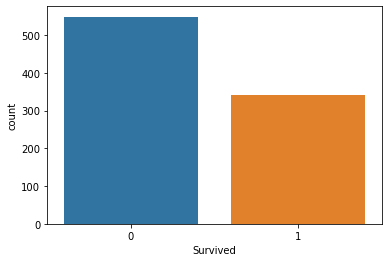

In [15]:
sns.countplot(tc['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

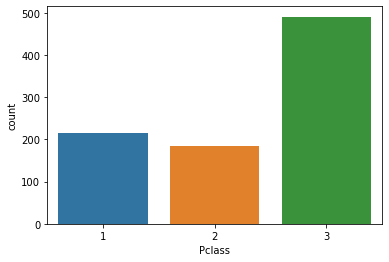

In [16]:
sns.countplot(tc['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

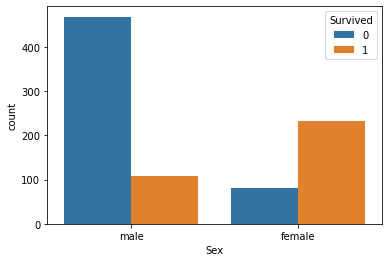

In [17]:
sns.countplot("Sex", hue='Survived',data=tc)

In [18]:
tc['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

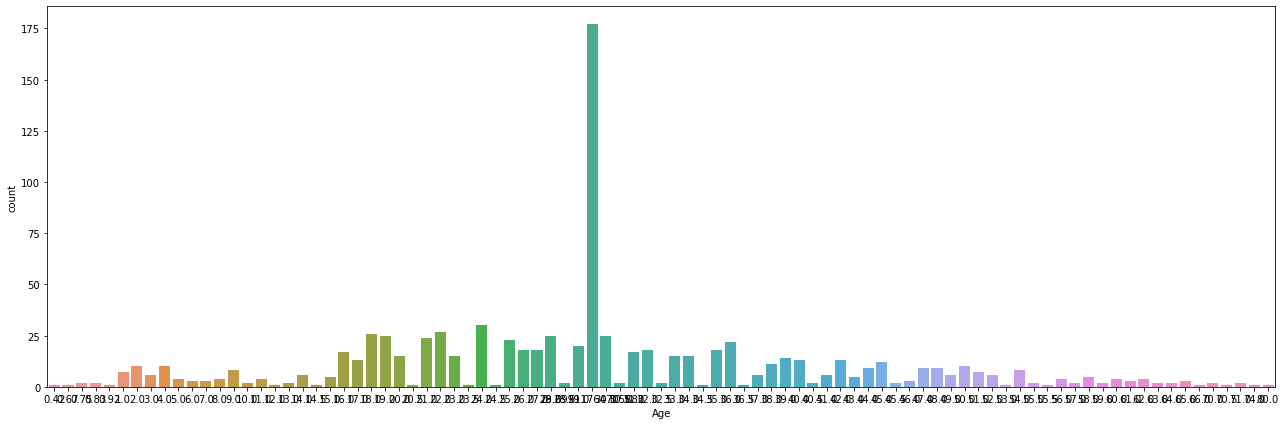

In [19]:
plt.figure(figsize=(22,7))
sns.countplot(tc['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

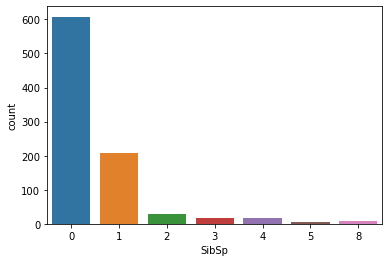

In [20]:
sns.countplot(tc['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

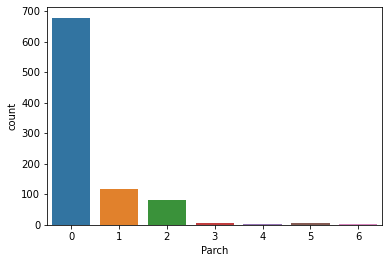

In [21]:
sns.countplot(tc['Parch'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

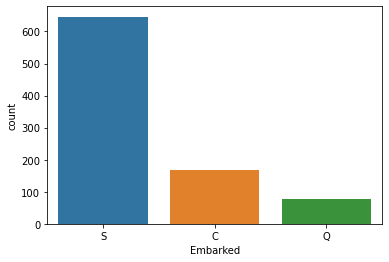

In [22]:
sns.countplot(tc['Embarked'])

# Encoding the categorical columns

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tc['Sex'] = le.fit_transform(tc['Sex'])
tc['Embarked'] = le.fit_transform(tc['Embarked'])

<AxesSubplot:>

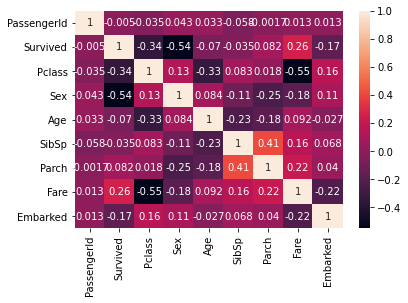

In [24]:
tc_co=tc.corr()
sns.heatmap(tc_co, annot=True)

In [25]:
tc.corr()['Survived'].sort_values()

Sex           -0.543351
Pclass        -0.338481
Embarked      -0.167675
Age           -0.069809
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [26]:
# independent data
x = tc.drop(columns=['PassengerId','Name','Ticket','Survived'] ,axis=1)
# target
y = tc['Survived']

# Finding best random state 

In [27]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    predrf = lr.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is ',maxAccu,'on Random_state',maxRS)

Best accuracy is  0.8659217877094972 on Random_state 11


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=.20 ,random_state=11)

# LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print('Accuracy',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy 0.8659217877094972
[[108  10]
 [ 14  47]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       118
           1       0.82      0.77      0.80        61

    accuracy                           0.87       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86      0.87      0.86       179



# DecisionTreeClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred1 = dtc.predict(x_test)
print('Accuracy',accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

Accuracy 0.7877094972067039
[[99 19]
 [19 42]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       118
           1       0.69      0.69      0.69        61

    accuracy                           0.79       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.79      0.79      0.79       179



# SVC

In [31]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred2 = svc.predict(x_test)
print('Accuracy',accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

Accuracy 0.7206703910614525
[[110   8]
 [ 42  19]]
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       118
           1       0.70      0.31      0.43        61

    accuracy                           0.72       179
   macro avg       0.71      0.62      0.62       179
weighted avg       0.72      0.72      0.68       179



# MultinomialNB

In [32]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
pred3 = mnb.predict(x_test)
print('Accuracy',accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))


Accuracy 0.7430167597765364
[[105  13]
 [ 33  28]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       118
           1       0.68      0.46      0.55        61

    accuracy                           0.74       179
   macro avg       0.72      0.67      0.68       179
weighted avg       0.73      0.74      0.73       179



# Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y, cv=5)
print(score)
print(score.mean())
print(score.std())

[0.78212291 0.78089888 0.78089888 0.76966292 0.82022472]
0.786761659657272
0.01733439181829156


# Hyper parameter tuning

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
parameters = {'C': [0.01, 0.1, 1, 2, 10,], 'penalty': ['l1', 'l2']}

GCV = GridSearchCV(estimator=lr,param_grid=parameters,scoring='accuracy',cv=5)
GCV.fit(x_train,y_train)

best_parameters = GCV.best_params_
print(best_parameters)
best_result = GCV.best_score_
print(best_result)

{'C': 0.1, 'penalty': 'l2'}
0.7851176992022062


# Saving the model

In [35]:
import joblib
joblib.dump(lr,'titanic.pkl')

['titanic.pkl']